In [10]:
library(dplyr)
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 10)

In [8]:
raw_campaign_finance <- read.table("campaign_finance.txt", sep = "|", header = FALSE, na.strings = c("", "NA"),fill = TRUE)

# Assign column names  
colnames(raw_campaign_finance) <- c("CAND_ID", "CAND_NAME", "CAND_ICI","PTY_CD","CAND_PTY_AFFILIATION", "TTL_RECEIPTS", "TRANS_FROM_AUTH", "TTL_DISB", 
                        "TRANS_TO_AUTH", "COH_BOP", "COH_COP","CAND_CONTRIB", "CAND_LOANS", "OTHER_LOANS", "CAND_LOAN_REPAY", "OTHER_LOAN_REPAY", 
                        "DEBTS_OWED_BY","TTL_INDIV_CONTRIB", "CAND_OFFICE_ST", "CAND_OFFICE_DISTRICT", "SPEC_ELECTION", "PRIM_ELECTION", "RUN_ELECTION", 
                        "GEN_ELECTION", "GEN_ELECTION_PRECENT", "OTHER_POL_CMTE_CONTRIB", "POL_PTY_CONTRIB", "CVG_END_DT", "INDIV_REFUNDS", "CMTE_REFUNDS")

# Select needed columns
reduced_finance <- raw_campaign_finance |>
                select("CAND_ID","CAND_NAME", "PTY_CD", "TRANS_FROM_AUTH", "TTL_DISB", "TRANS_TO_AUTH", "CAND_CONTRIB", 
                       "CAND_LOANS", "OTHER_LOANS", "CAND_LOAN_REPAY", "OTHER_LOAN_REPAY", "TTL_INDIV_CONTRIB", 
                       "OTHER_POL_CMTE_CONTRIB", "POL_PTY_CONTRIB","INDIV_REFUNDS", "CMTE_REFUNDS")

In [3]:
# Check for missing values
na_rows <- reduced_finance %>%
  filter(rowSums(is.na(.)) > 0)
# na_rows

# Drop the one row with NA data
filtered_finance <- reduced_finance %>%
    filter(!is.na(PTY_CD)) 
# head(filtered_finance)

In [4]:
# Identify which columns represent amounts received and amounts spent for each candidate
flow_in <- filtered_finance[, c("TRANS_FROM_AUTH", "CAND_CONTRIB", "CAND_LOANS","OTHER_LOANS","TTL_INDIV_CONTRIB", "OTHER_POL_CMTE_CONTRIB", "POL_PTY_CONTRIB")]
flow_out <- filtered_finance[, c("TTL_DISB", "TRANS_TO_AUTH", "CAND_LOAN_REPAY", "OTHER_LOAN_REPAY","INDIV_REFUNDS", "CMTE_REFUNDS")]
                       
# Calculate the difference between amounts received and spent for each candidate
overall_flow <- rowSums(flow_in) - rowSums(flow_out)

# Create a new dataframe 
flow_summary <- data.frame(
    candidate_id = filtered_finance$CAND_ID,
    candidate_name = filtered_finance$CAND_NAME,
    party_type = filtered_finance$PTY_CD,
    overall_flow = overall_flow
)

# Calculate the percentile rank
flow_summary$overall_flow_percentile <- rank(flow_summary$overall_flow) / length(flow_summary$overall_flow) * 100

head(flow_summary)

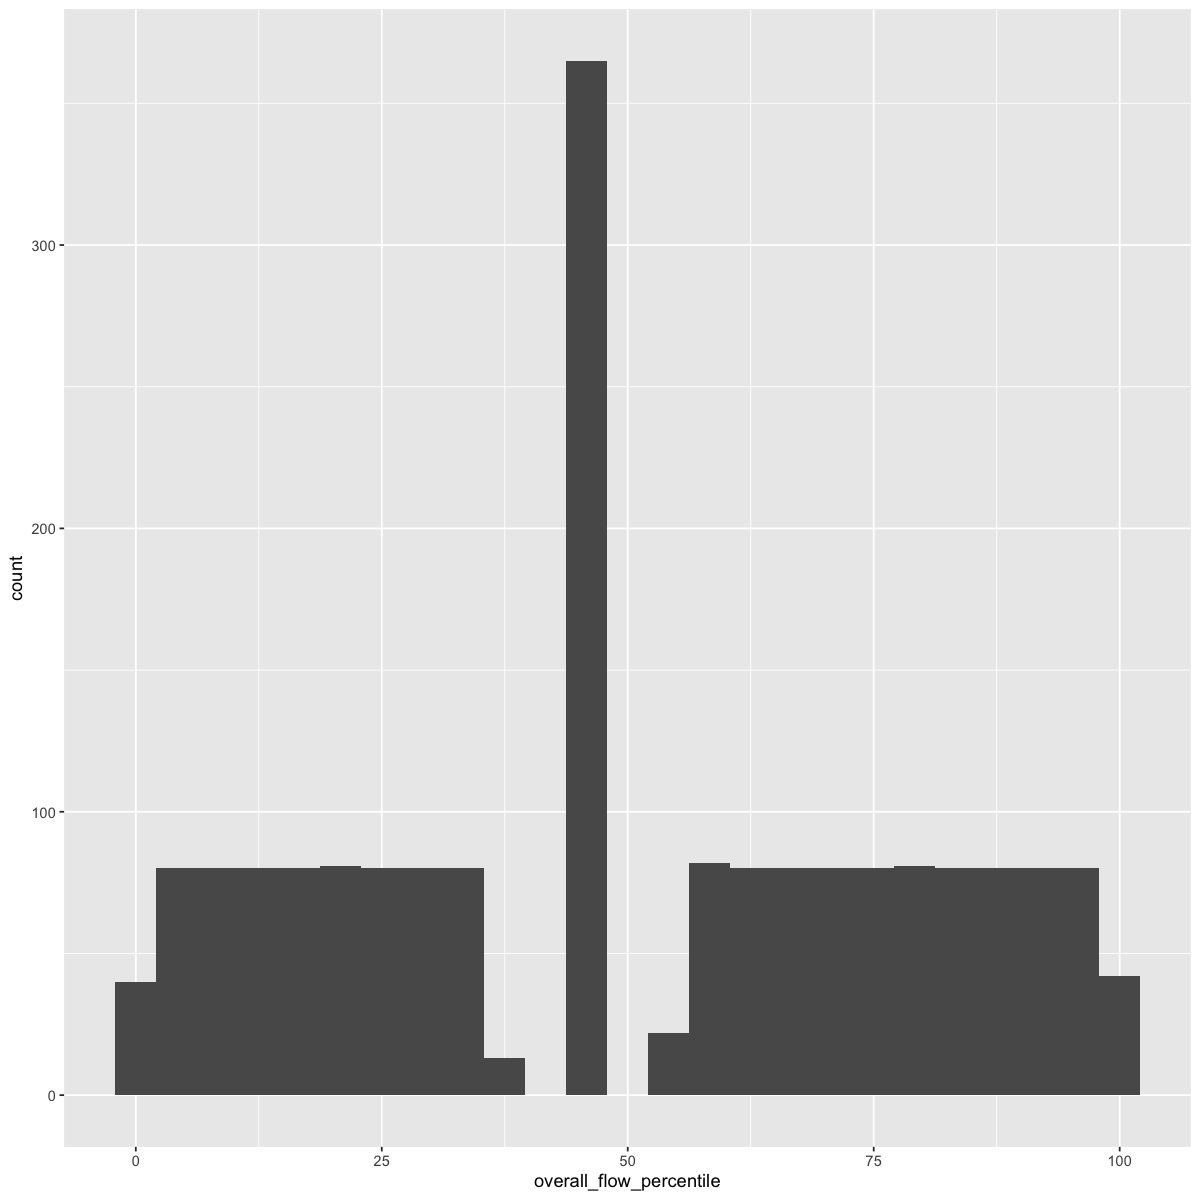

In [13]:
dist <- flow_summary |>
        ggplot() +
        geom_histogram(aes(x = overall_flow_percentile), bins = 25)
dist

In [7]:
# # Define the number of bins
# num_bins <- 100

# # Calculate the bin width
# bin_width <- (max(flow_summary$overall_flow) - min(flow_summary$overall_flow)) / num_bins

# # Create bin boundaries
# bin_boundaries <- seq(min(flow_summary$overall_flow), max(flow_summary$overall_flow) + bin_width, by = bin_width)

# # Create a new column with bin labels
# flow_summary$overall_flow_bin <- cut(flow_summary$overall_flow, breaks = bin_boundaries, labels = FALSE)

# bin_width
# head(flow_summary)
# # bin_boundaries

# flow_summary$overall_flow_binned <- NA  # Initialize the new column with NA values
 
# flow_summary <- flow_summary %>%
#   mutate(
#     overall_flow_binned = case_when(
#         overall_flow_scaled == 0 ~ 0,
#         (overall_flow_scaled > 0 & overall_flow_scaled < 6) ~ 1,
#         (overall_flow_scaled > 5 & overall_flow_scaled < 11) ~ 2,
#         (overall_flow_scaled > 10) ~ 3,
#         # (overall_flow_scaled > 3e+07 & overall_flow_scaled < 4e+07) ~ 4,
#         # (overall_flow_scaled > 4e+07 & overall_flow_scaled < 5e+07) ~ 5,
#         # (overall_flow_scaled > 5e+07 & overall_flow_scaled < 6e+07) ~ 6,
#         # (overall_flow_scaled > 6e+07) ~ 7,
#       TRUE ~ NA_real_  # Use NA_real_ to ensure NA is numeric
#     )
#   )

# flow_summary



# Assuming your data frame is named df
# flow_summary_bins <- flow_summary %>%
#   mutate(
#     overall_flow_scaled_binned = cut(overall_flow, 
#                                      breaks = seq(-220504869, 66974109.07, length.out = 101), 
#                                      labels = FALSE, include.lowest = TRUE)
#   )
# head(flow_summary_bins)

# min(flow_summary$overall_flow)
# max(flow_summary$overall_flow )

# uvals <- unique(filtered_finance$CAND_PTY_AFFILIATION, filtered_finance$PTY_CD)
# uvals

# print(unique(flow_summary_bins$overall_flow[flow_summary_bins$overall_flow_scaled_binned >1]))


# filt <- flow_summary_bins |>
#         filter(overall_flow < 0)
# filt